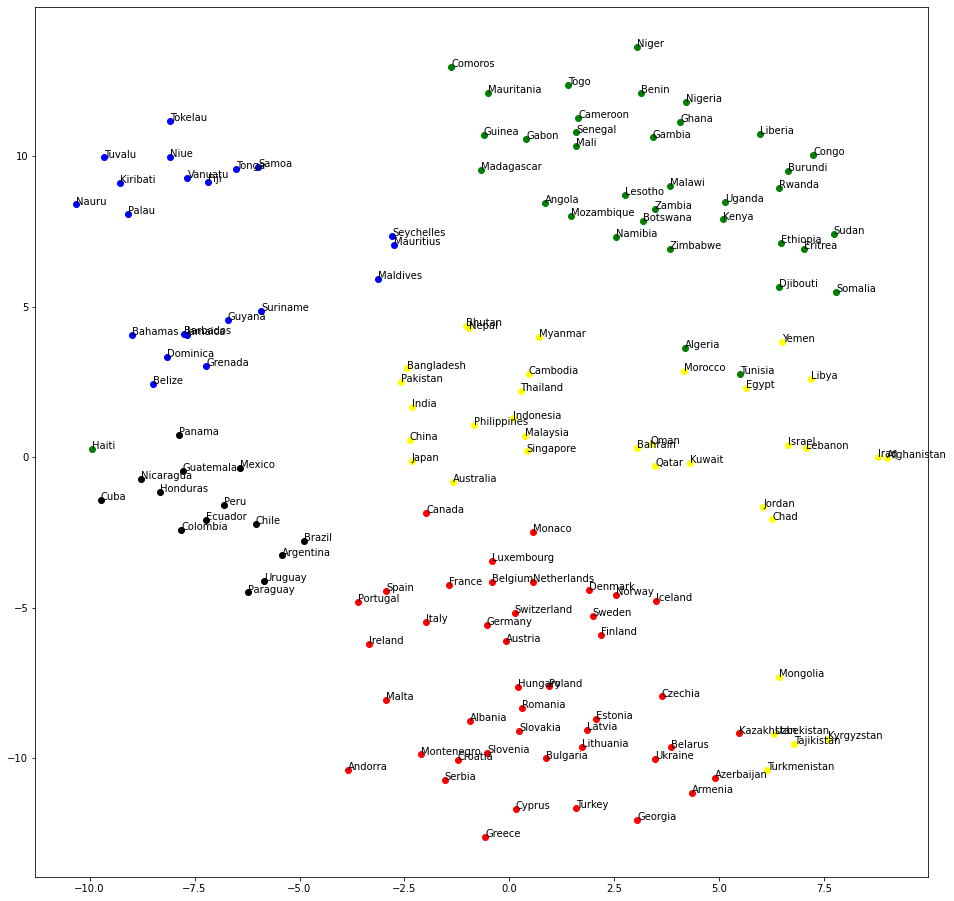

In [38]:
import gensim
from gensim.models import KeyedVectors
model=gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz",binary=True)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
with open("kuni.txt","r",encoding="utf-8") as k:
    country=[]
    for line in k:
        line=line.strip()
        words=line.split("\t")
        if words[0] in model:
            country.append(words[0])
    country_v=[model[c] for c in country]
    
    #69
    tsne=TSNE(random_state=123).fit_transform(country_v)
    
    kmeans=KMeans(random_state=123,n_clusters=5)
    kmeans.fit(country_v)
    
    plt.figure(figsize=(16,16))
    for i in range(5):
        cluster=np.where(kmeans.labels_==i)[0]
        for num in cluster:
            if i==0:cl="green"
            elif i==1:cl="red"
            elif i==2:cl="yellow"
            elif i==3:cl="black"
            else:cl="blue"
            plt.scatter(tsne[num][0],tsne[num][1],color=cl)
            plt.annotate(country[num],(tsne[num][0],tsne[num][1]))
 